<a href="https://colab.research.google.com/github/YounseoKim62/python_for_DA/blob/main/apt_price_analysis_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# apt price analysis summary

* 파이썬을 활용한 데이터 분석의 기초
* pandas와 numpy를 사용한 기본적인 EDA
* pandas와 numpy를 사용한 결측치 처리 또는 이상치 처리 등 기본적인 데이터 전처리
* matplotlib 또는 seaborn을 사용하여 데이터를 시각화

## data preprocessing

### 패키지와 데이터 불러오기

In [30]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# 한글로 설정된 엑셀 파일은 인코딩을 설정해주어야 한글이 깨지지 않음
# 보통 cp949 또는 euc-kr로 인코딩 되어 있음
df_last = pd.read_csv('/content/drive/MyDrive/데이터 분석/공부/1. 신규 민간 아파트 분양가 분석/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv',
                      encoding = 'cp949',
                      engine = 'python')

df_first = pd.read_csv('/content/drive/MyDrive/데이터 분석/공부/1. 신규 민간 아파트 분양가 분석/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding = 'cp949',
                      engine = 'python')

### 데이터 파악하기

In [2]:
# .shape을 사용하여 row와 column의 갯수를 출력
df_last.shape

(4335, 5)

In [3]:
# .head(10)를 사용하여 첫 10개의 row를 출력
df_last.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


In [4]:
# .tail()을 사용하여 마지막 5개의 row를 출력
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


In [5]:
# .info()를 사용하여 변수 별 정보를 출력
# Null이 아닌 값의 갯수와 변수 데이터 타입을 확인가능
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [6]:
# .describe()를 사용하여 numeric 변수의 기본 통계를 출력
df_last.describe()

,연도,월
count,4335.000000,4335.000000
mean,2017.352941,6.764706
std,1.234035,3.518361
min,2015.000000,1.000000
25%,2016.000000,4.000000
50%,2017.000000,7.000000
75%,2018.000000,10.000000
max,2019.000000,12.000000


### 결측치 확인

In [7]:
# .isnull().sum() 을 통해 각 변수의 결측치 갯수를 출력
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

### 데이터 타입 변경

In [8]:
# pd.to_numeric()을 사용하여 object 타입으로 저장된 변수를 numeric 타입으로 변경
# errors = 'coerce'를 사용하여 numeric 타입으로 변형이 안되는 값들은 NaN으로 변경
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors = 'coerce')

### numeric 변수 수정

In [9]:
# 밑에와 같은 형식으로 새로운 변수를 만들 수 있음
df_last['평당분양가격'] = df_last['분양가격'] * 3.3

### 변수 파악하기

In [10]:
# .describe()를 object 변수에 사용
df_last['분양가격(㎡)'].describe()

# include = 'object'를 사용하면 모든 object 변수의 통계를 출력
# df_last.describe(include = 'object')

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [28]:
# .value_counts()를 사용해 변수에 각 unique값이 몇개있는지 확인
df_last['전용면적'].value_counts()

전용면적
전체          867
60㎡         867
60㎡~85㎡     867
85㎡~102㎡    867
102㎡~       867
Name: count, dtype: int64

In [11]:
# .describe()를 numeric 변수에 사용
df_last['분양가격'].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

### object 변수 수정

In [12]:
# .nunique()를 사용해 unique value의 갯수를 출력
df_last['규모구분'].nunique()

# 데이터셋에 .nunique()를 사용하면 각 변수의 unique 값의 갯수를 출력
# df_last.nunique()

5

In [13]:
# .unique()를 사용해 unique value를 출력
df_last['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [14]:
# str accessor의 .replace()를 사용하여 단어들을 변경
# str accessor의 .strip()을 사용하여 앞뒤의 space를 제거
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')
df_last['전용면적'] = df_last['전용면적'].str.replace('이하', '')
df_last['전용면적'] = df_last['전용면적'].str.replace('초과', '~')
df_last['전용면적'] = df_last['전용면적'].str.replace(' ', '')
df_last['전용면적'] = df_last['전용면적'].str.strip()
df_last['전용면적']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

### 변수 제거

In [21]:
# drop을 사용하여 필요없는 row 또는 column 제거
# axis = 0: row, axis = 1: column
df_last = df_last.drop(['규모구분', '분양가격(㎡)'], axis = 1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


## groupby

In [8]:
# '지역명' column을 기준으로 그룹화
# 각 그룹 (ex. 서울, 경기, 제주, etc.)에서 '평당분양가격' column을 선택
# 그룹별로 '평당분양가격'의 mean을 계산
df_last.groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [9]:
# '지역명'과 '전용면적' column을 기준으로 그룹화
# 각 그룹 (ex. 서울의 59m², 서울의 84m², 부산의 84m²)에서 '평당분양가격' column을 선택
# 그룹별로 '평당분양가격'의 mean을 계산
a = df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean().unstack().round()
a

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


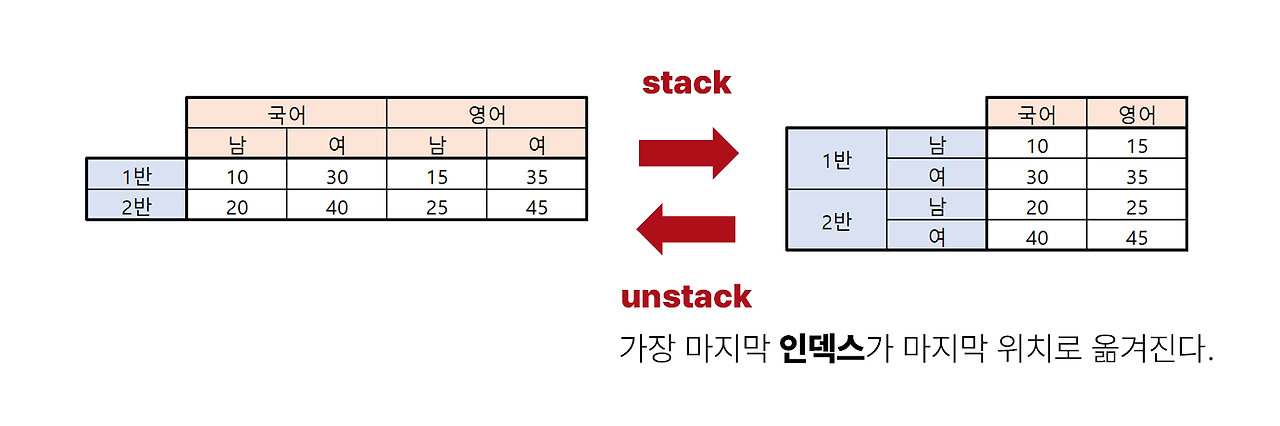

In [ ]:
# .loc[]을 사용하여 '서울' row 의 값을 가져옴
a.loc['서울']

전용면적
102㎡~       23446.0
60㎡         23213.0
60㎡~85㎡     22787.0
85㎡~102㎡    25944.0
전체          22610.0
Name: 서울, dtype: float64

In [ ]:
# .transpose()를 사용하여 row와 column의 위치를 변경
a.transpose()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


## pivot_table

In [ ]:
# '지역명' column을 기준으로 그룹화
# 각 그룹 (ex. 서울, 경기, 제주, etc.)에서 '평당분양가격' column을 선택
# 그룹별로 '평당분양가격'의 mean을 계산 (aggfunc를 사용하지 않아도 자동으로 'mean'을 return)
pd.pivot_table(df_last,
               index = ['지역명'],
               values = ['평당분양가격'],
               aggfunc = 'mean')

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [ ]:
# 다중 인덱스를 사용하여 지역명과 전용면적의 조합별로 평당분양가격의 평균을 계산하여 나열

# '지역명'과 '전용면적' column을 기준으로 그룹화
# 각 그룹 (ex. 서울의 59m², 서울의 84m², 부산의 84m²)에서 '평당분양가격' column을 선택
# 그룹별로 '평당분양가격'의 mean을 계산
pd.pivot_table(df_last,
                   index = ['지역명', '전용면적'],
                   values = ['평당분양가격'],
                   aggfunc = 'mean')

평당분양가격
지역명 전용면적                 
강원  102㎡~     8311.380000
    60㎡       7567.098000
    60㎡~85㎡   7485.588000
    85㎡~102㎡  8749.557143
    전체        7477.536000
...                   ...
충북  102㎡~     8195.352000
    60㎡       7103.118000
    60㎡~85㎡   7264.488000
    85㎡~102㎡  8391.306000
    전체        7219.014000

[85 rows x 1 columns]

In [ ]:
# 지역명을 인덱스로, 전용면적을 column으로 사용하여 각 지역명별 여러 전용면적의 평당분양가격 평균을 한 테이블 나열
b = pd.pivot_table(df_last,
                index = ['지역명'],
                columns = ['전용면적'],
                values = ['평당분양가격'],
                aggfunc = 'mean')
b

평당분양가격                                                        
전용면적         102㎡~           60㎡       60㎡~85㎡      85㎡~102㎡            전체
지역명                                                                       
강원     8311.380000   7567.098000   7485.588000   8749.557143   7477.536000
경기    14771.790000  13251.744000  12523.566000  13677.774000  12559.602000
경남    10358.363265   8689.175000   8618.676000  10017.612000   8658.672000
경북     9157.302000   7883.172000   8061.372000   8773.814634   8078.532000
광주    11041.532432   9430.666667   9910.692000   9296.100000   9903.630000
대구    13087.338000  11992.068000  11778.690000  11140.642857  11771.298000
대전    14876.871429   9176.475000   9711.372000   9037.430769   9786.018000
부산    13208.250000  11353.782000  11864.820000  12072.588000  11936.166000
서울    23446.038000  23212.794000  22786.830000  25943.874000  22610.346000
세종    10106.976000   9323.927027   9775.458000   9847.926000   9805.422000
울산     9974.448000   9202.106897  10502.531707   8861.007692  10492.712195
인천    14362.030435  11241.318000  11384.406000  11527.560000  11257.026000
전남     8168.490000   7210.170000   7269.240000   7908.862500   7283.562000
전북     8193.570000   7609.932000   7271.352000   8275.781250   7292.604000
제주    10522.787234  14022.221053  10621.314000  10709.082353  10784.994000
충남     8689.169388   7911.156000   7818.954000   9120.045000   7815.324000
충북     8195.352000   7103.118000   7264.488000   8391.306000   7219.014000

## 데이터 시각화

### 시각화 패키지와 폰트 설정

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

!apt-get update -qq
!apt-get install fonts-nanum* -qq

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)

# plt.rc()에서 plt의 다양한 기본설정 (선의 굵기, 폰트, figure size 등)을 변경 할 수 있음
# plt.rc("font", family="Malgun Gothic", size = 14)

plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})

mpl.rcParams['axes.unicode_minus'] = False # 음수가 깨질때

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123589 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

### lineplot

<Axes: xlabel='지역명', ylabel='평당분양가격'>

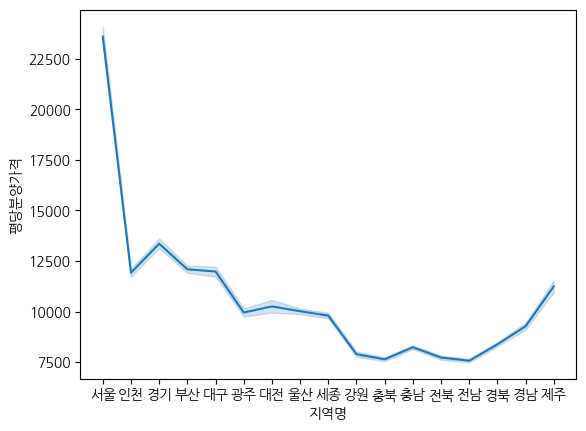

In [62]:
# 지역당 분양가격의 평균을 line graph로 시각화
sns.lineplot(data = df_last, x = '지역명', y = '평당분양가격')

### barplot

<Axes: xlabel='지역명', ylabel='평당분양가격'>

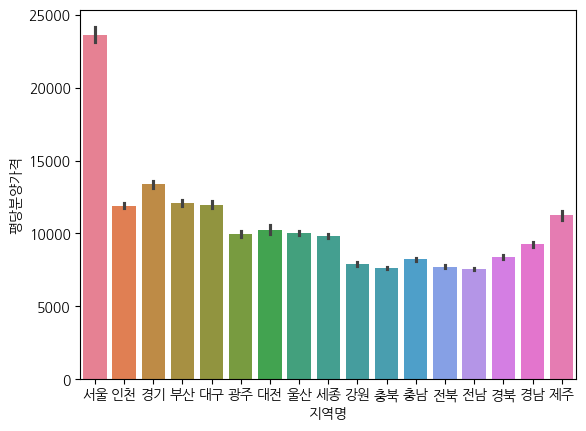

In [65]:
# 지역당 분양가격의 평균을 bar graph로 시각화
sns.barplot(data = df_last, x = '지역명', y = '평당분양가격', hue = '지역명')

<Axes: xlabel='지역명', ylabel='평당분양가격'>

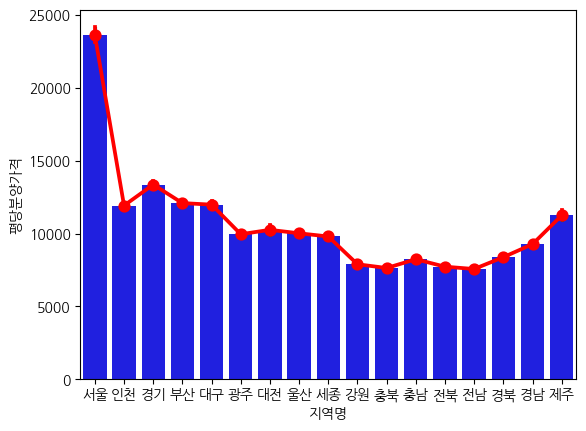

In [66]:
# barplot과 pointplot은 함께 사용가
sns.barplot(data = df_last, x = '지역명', y = '평당분양가격', color = 'b')
sns.pointplot(data = df_last, x = '지역명', y = '평당분양가격', color = 'r')

### boxplot

<Axes: xlabel='연도', ylabel='평당분양가격'>

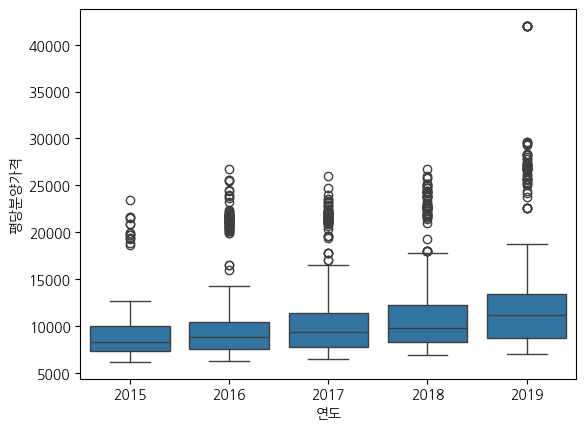

In [52]:
# box plot
sns.boxplot(data = df_last, x = '연도', y = '평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

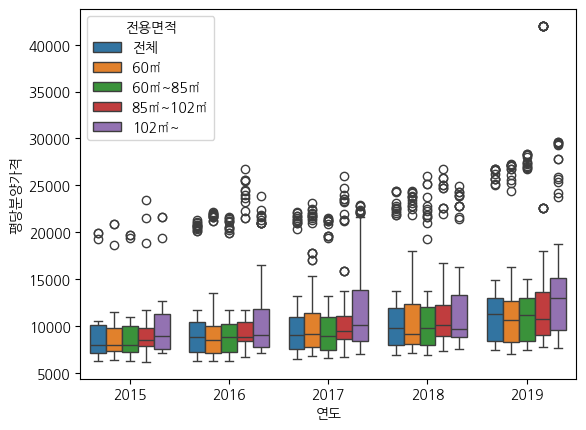

In [58]:
# hue 옵션을 사용하여 전용면적별로 시각화
sns.boxplot(data = df_last, x = '연도', y = '평당분양가격', hue = '전용면적')

#### 이상치 확인

- boxplot을 보았을때 2019년도에 이상치가 존재한다는것을 알 수 있음

In [79]:
df_last['평당분양가격'].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [77]:
max_price = df_last['평당분양가격'].max()
max_price

42002.399999999994

In [80]:
# 서울의 평당분양가격이 특히 높은 row를 특정할 수 있음
df_last[df_last['평당분양가격'] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


### violinplot

<Axes: xlabel='연도', ylabel='평당분양가격'>

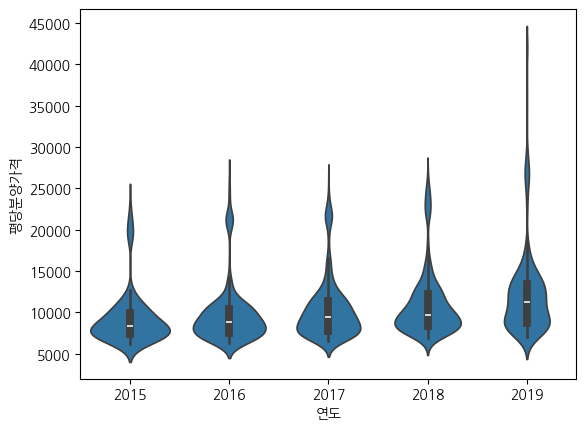

In [59]:
# violinplot
sns.violinplot(data = df_last, x = '연도', y = '평당분양가격')

### stacked lineplot

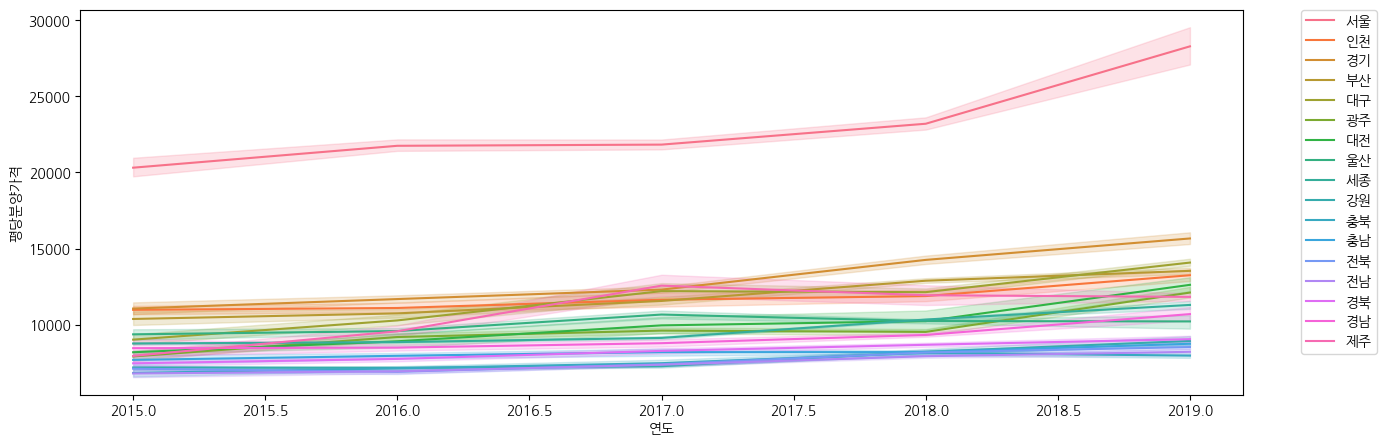

In [63]:
# stacked line graph

# figsize = (가로 사이즈, 세로 사이즈)
plt.figure(figsize = (15, 5))

sns.lineplot(data = df_last, x = '연도', y = '평당분양가격', hue = '지역명')

# legend의 위치 조정
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

### catplot

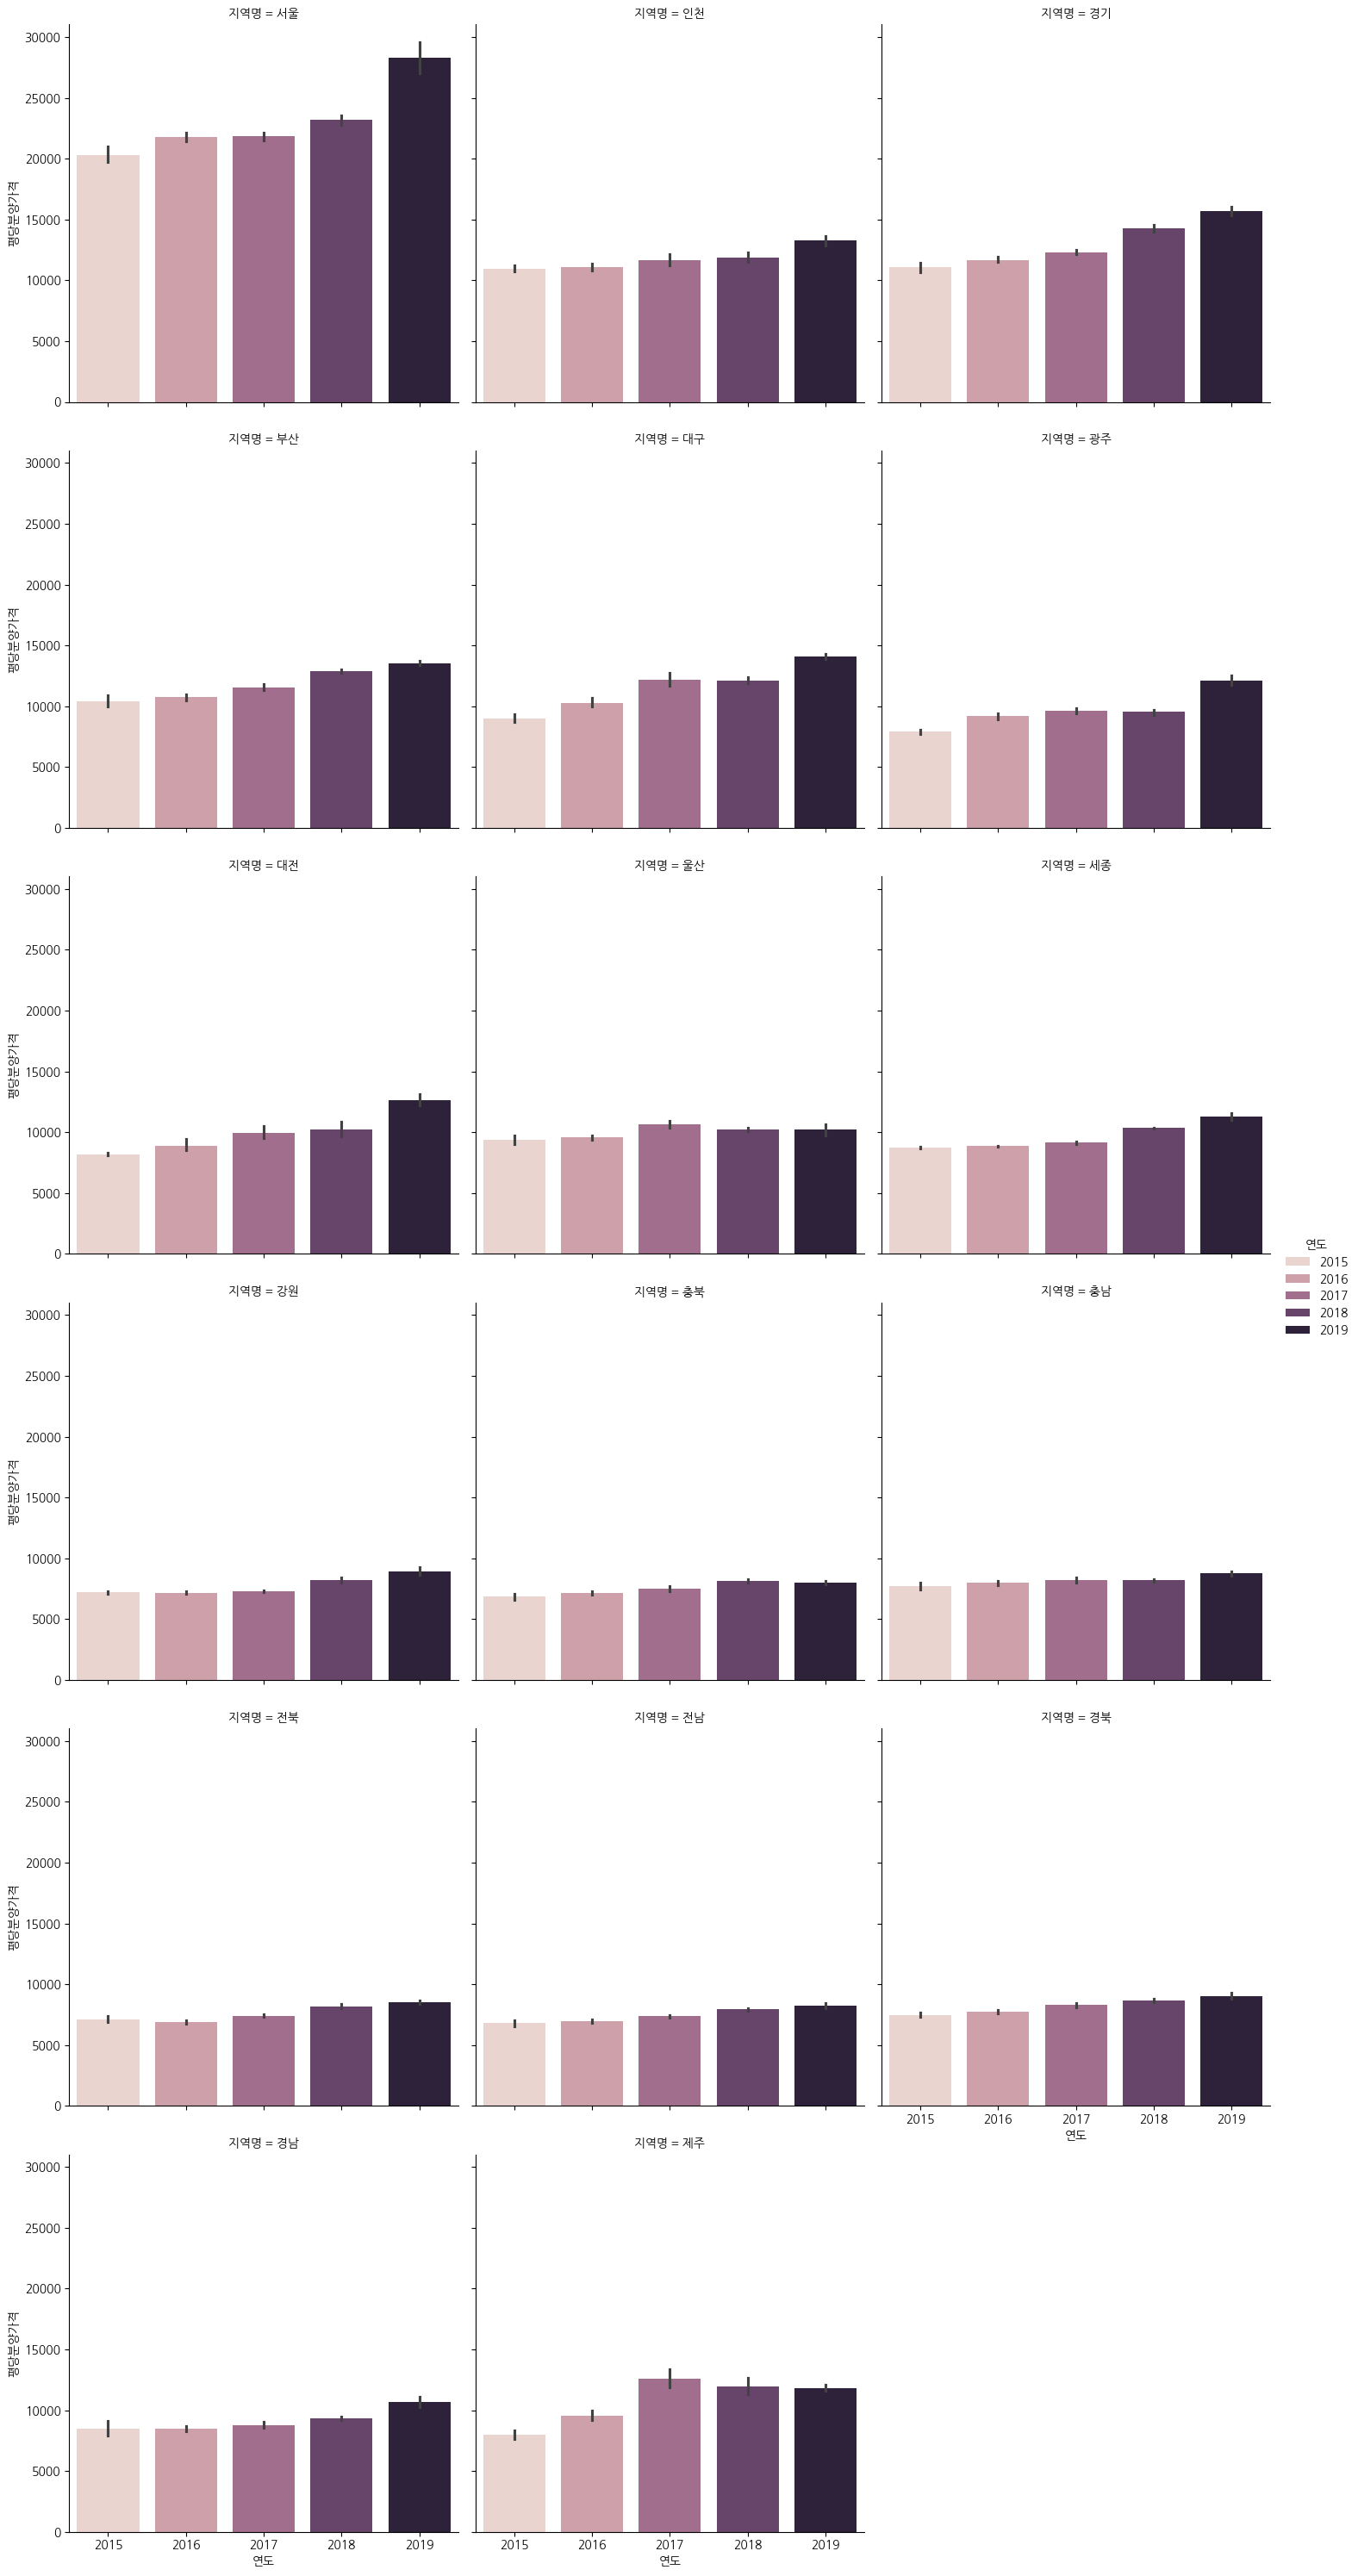

In [72]:
# catplot (범주형 변수를 시각화, ex. strip, swarm, box, violin, bar, and point plots)

# col_wrap = 가로줄당 그래프 수
sns.catplot(data = df_last,
            x = '연도',
            y = '평당분양가격',
            kind = 'bar',
            col = '지역명',
            col_wrap = 3,
            hue = '연도',
            )

### replot

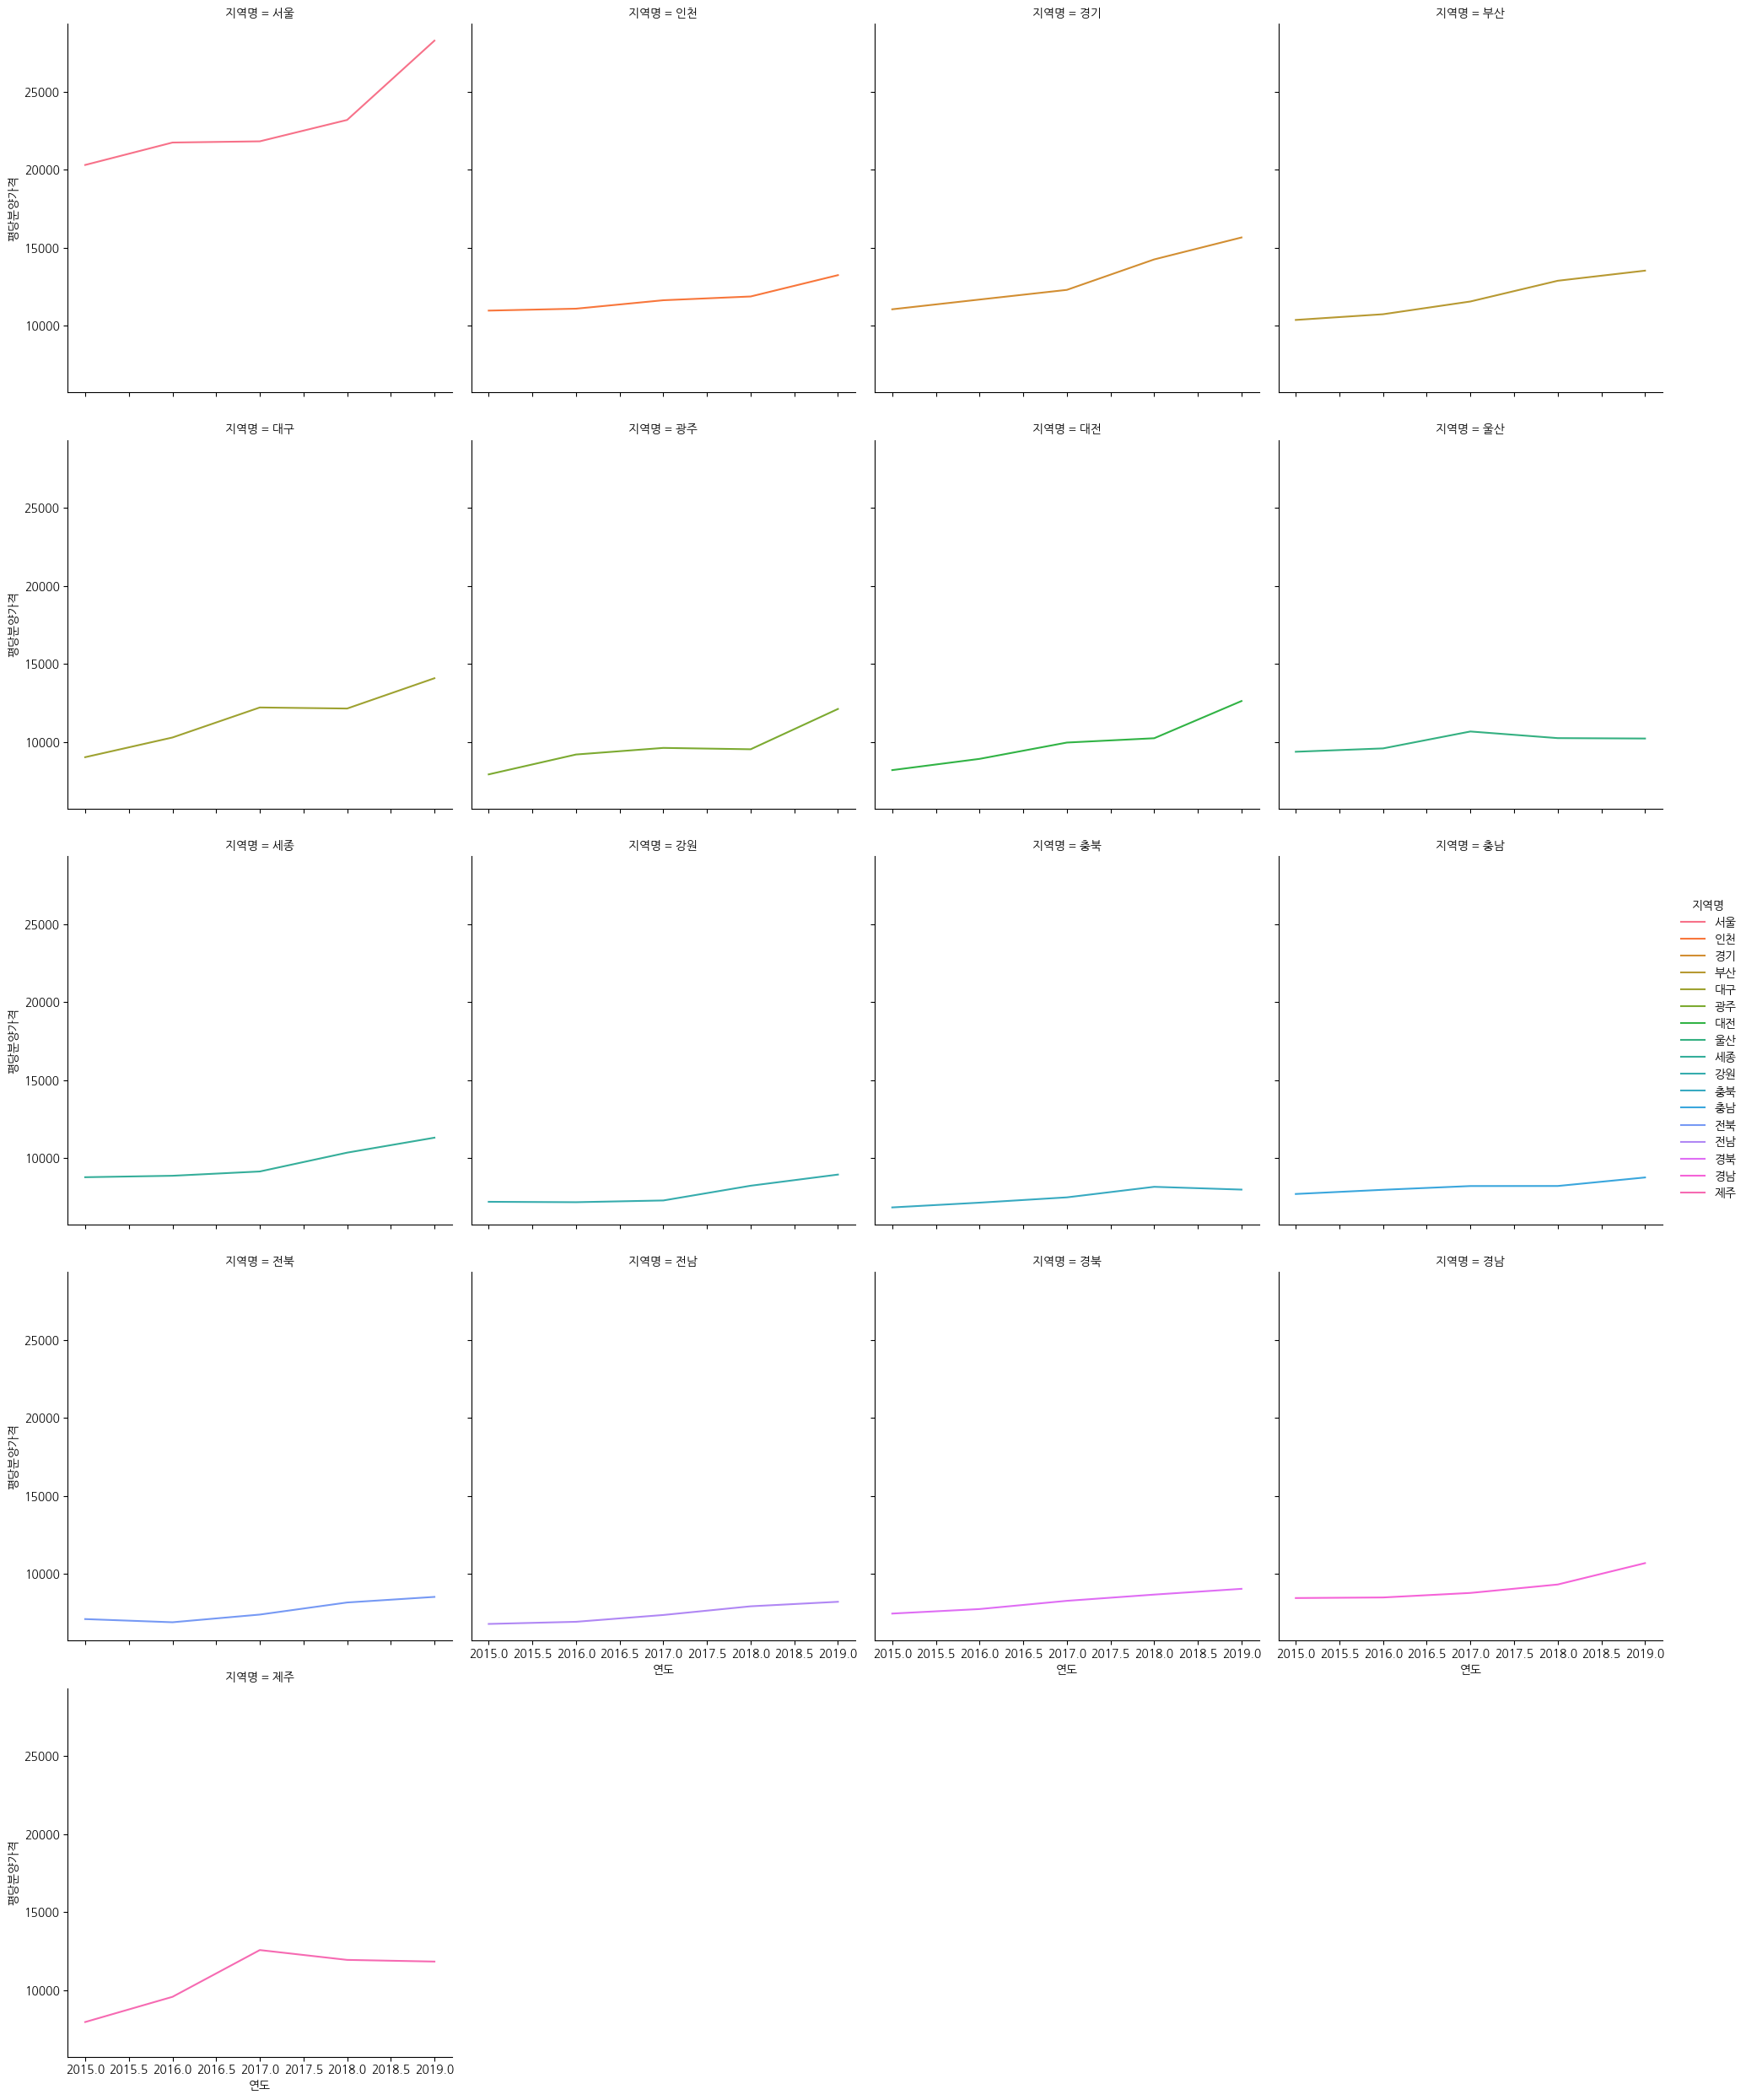

In [69]:
# replot (두 변수의 관계성을 보기 위한 그래프, ex. scatter and line plots)
sns.relplot(data = df_last,
            x = '연도',
            y = '평당분양가격',
            hue = '지역명',
            kind = 'line',
            col = '지역명',
            col_wrap = 4,
            errorbar = None) # errorbar는 confidence interval

### lmplot

<Axes: xlabel='연도', ylabel='평당분양가격'>

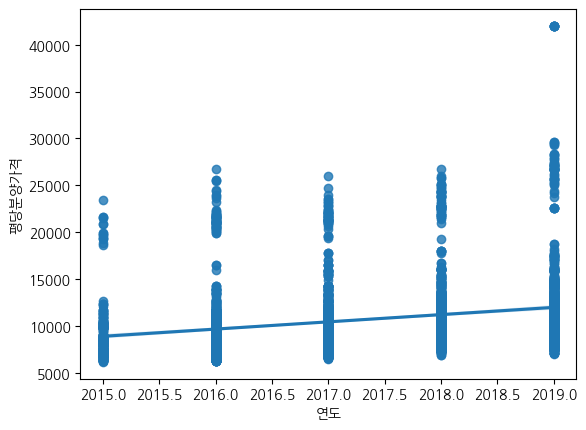

In [73]:
sns.regplot(data = df_last, x = '연도', y = '평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

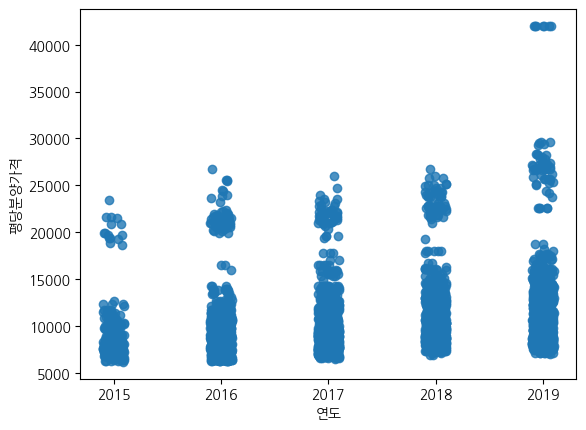

In [74]:
# x_jitter를 사용해 연도당 포인트들을 좀 더 옆으로 퍼트려서 시각화
# fit_reg = False로 하여 line을 제거 가능
sns.regplot(data = df_last,
            x = '연도',
            y = '평당분양가격',
            x_jitter = 0.1,
            fit_reg = False)

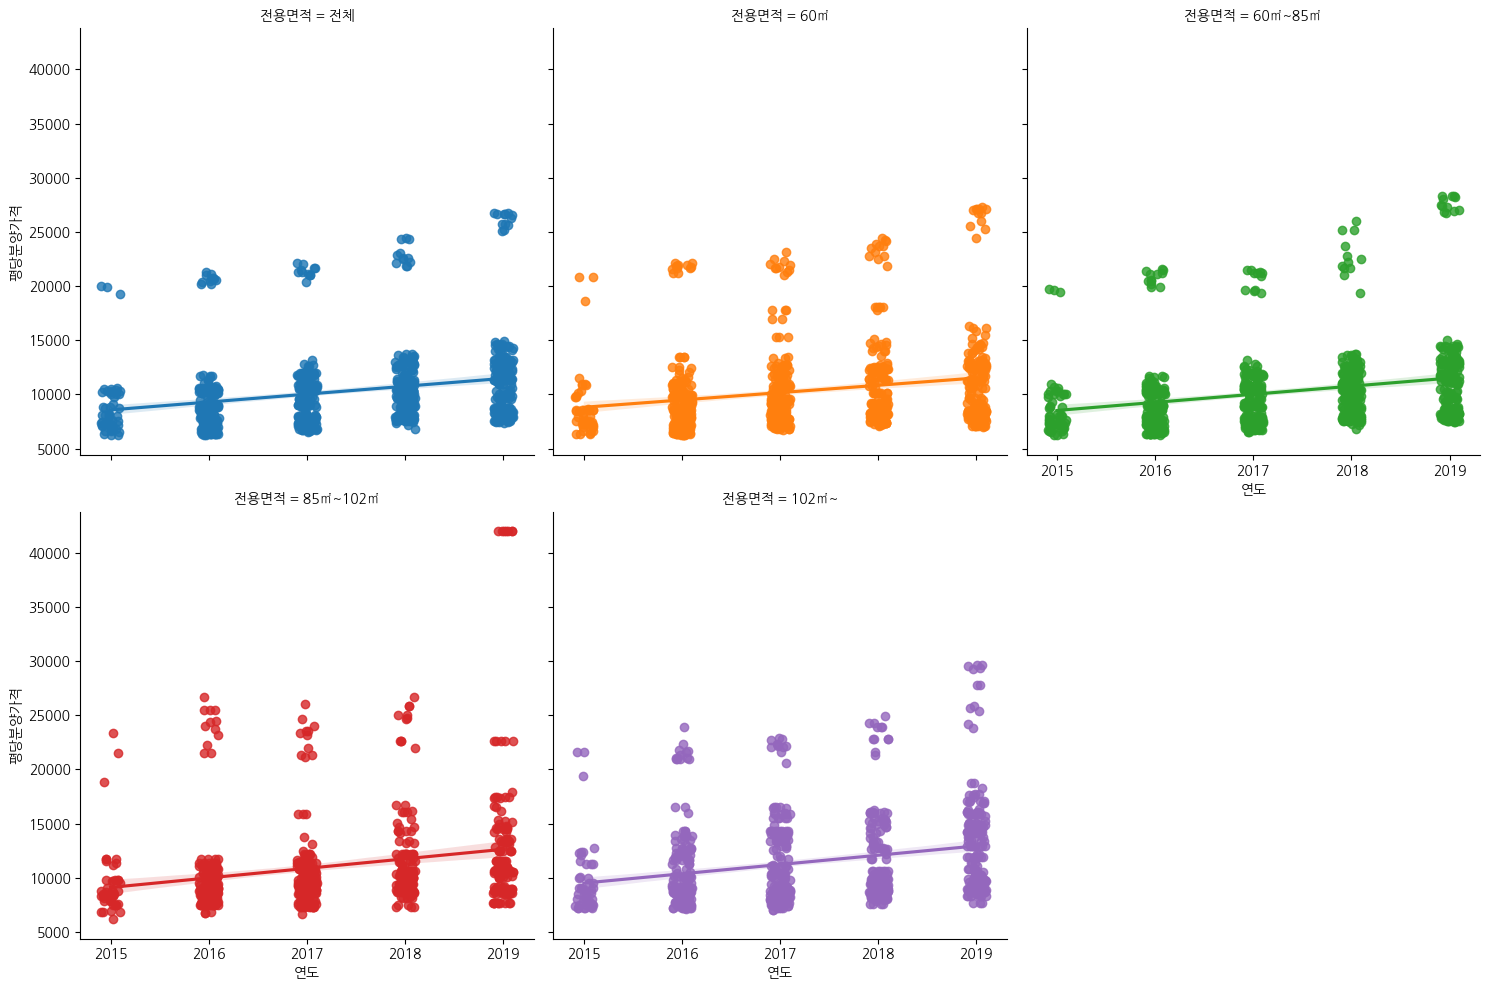

In [75]:
# 연도별 평당분양가를 lmplot으로 시각화
# hue옵션을 사용해 전용면적을 표현
sns.lmplot(data=df_last,
           x="연도",
           y="평당분양가격",
           hue="전용면적",
           col="전용면적",
           col_wrap=3,
           x_jitter=.1)

### swarmplot

<Axes: xlabel='연도', ylabel='평당분양가격'>

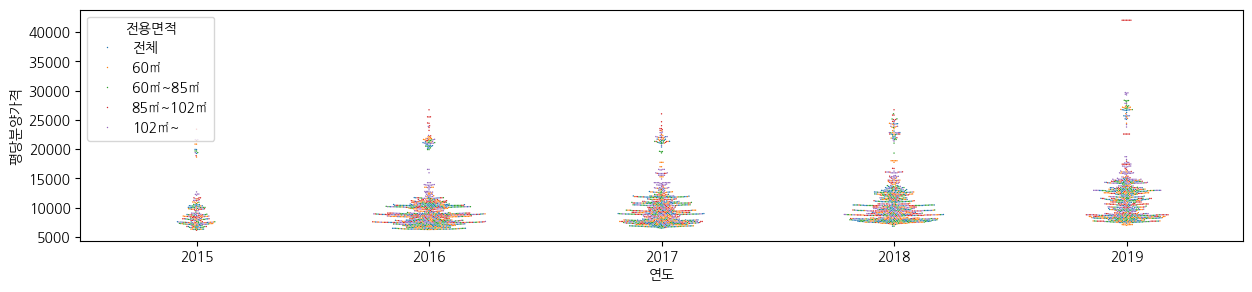

In [76]:
# 연도별 평당분양가격을 swarmplot으로 시각화
# 범주형 데이터의 산점도를 표현가능
plt.figure(figsize = (15,3))
sns.swarmplot(data = df_last,
              x = '연도',
              y = '평당분양가격',
              hue = '전용면적',
              size = 1)

### distribution plot

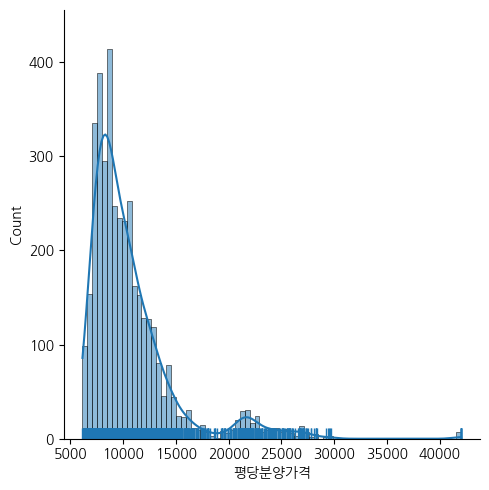

In [86]:
# displot을 사용해 평당분양가격을 시각화

# rug는 특정 x값에 얼마나 많은 값들이 있는지 시각화
sns.displot(data = df_last, x = '평당분양가격', kde = True, rug = True)

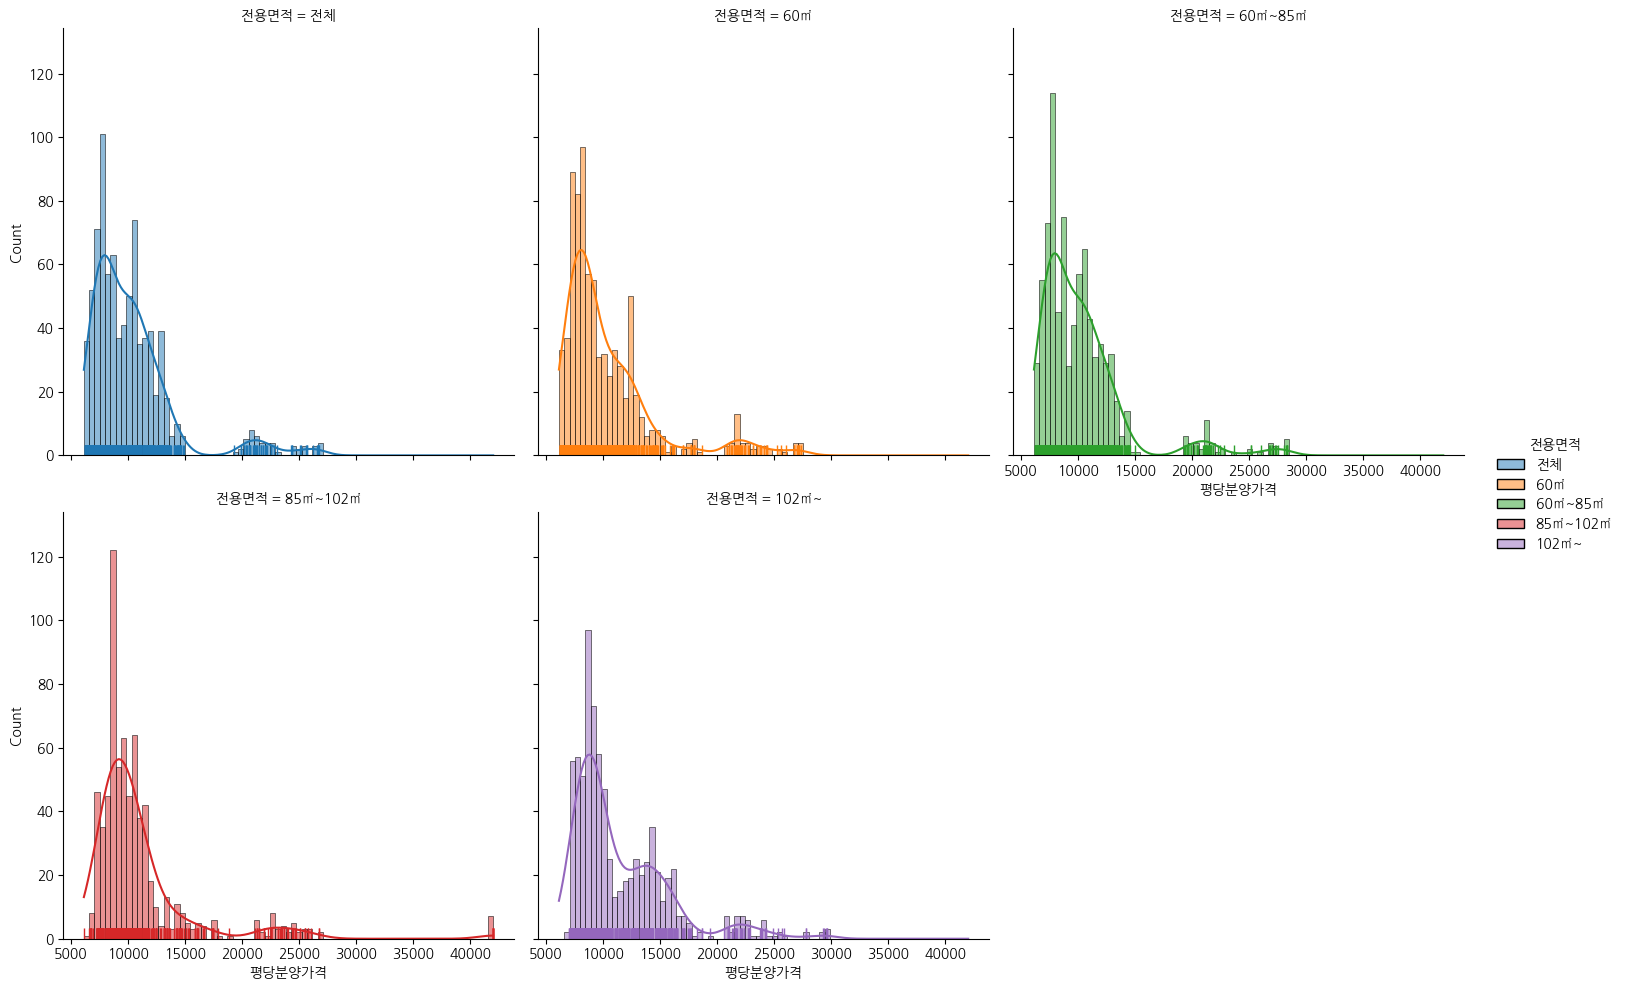

In [87]:
sns.displot(df_last,
            x = '평당분양가격',
            hue = '전용면적',
            col = '전용면적',
            col_wrap = 3,
            kde = True,
            rug = True)

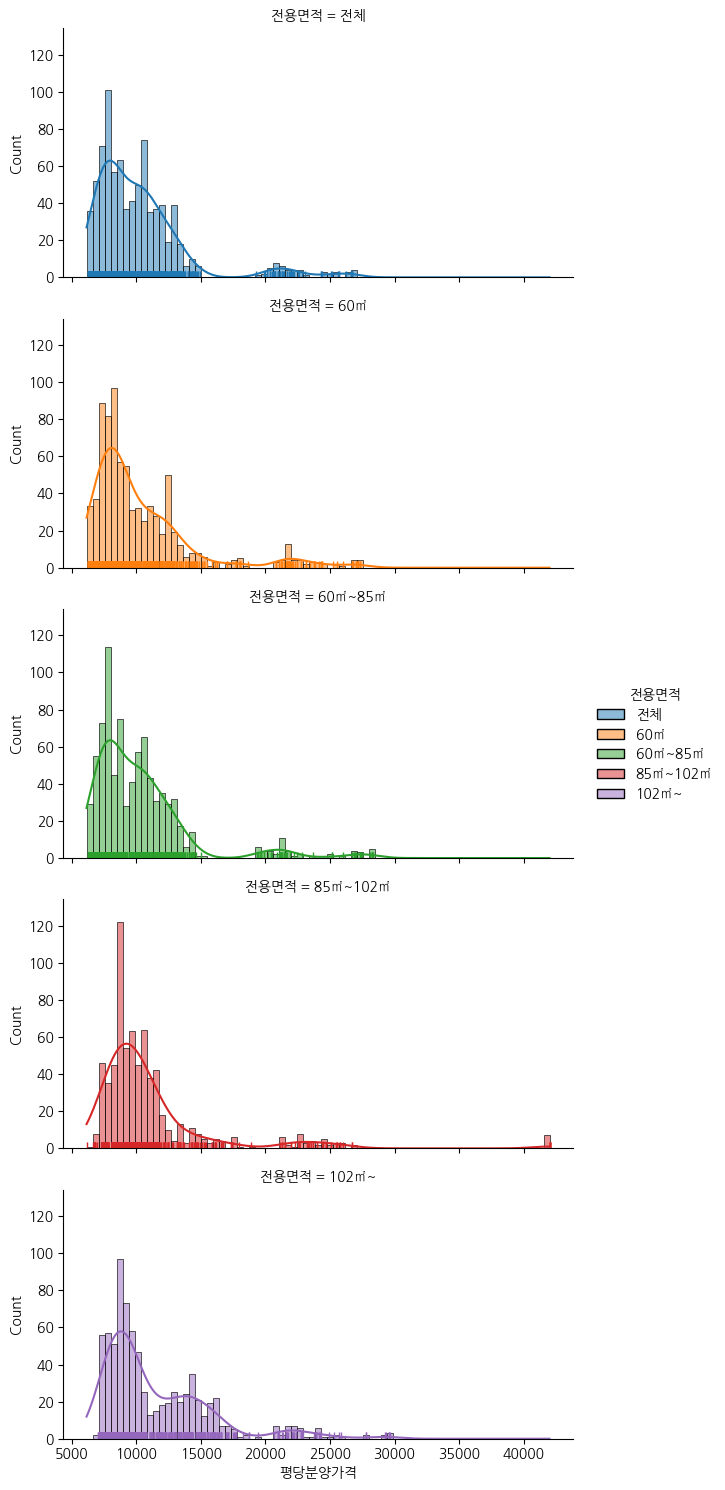

In [89]:
# aspect는 그래프의 가로길이, height은 새로길이를 나타냄
sns.displot(df_last,
            x = '평당분양가격',
            hue = '전용면적',
            col = '전용면적',
            col_wrap = 1,
            kde = True,
            rug = True,
            aspect = 2,
            height = 3)

### facetgrid

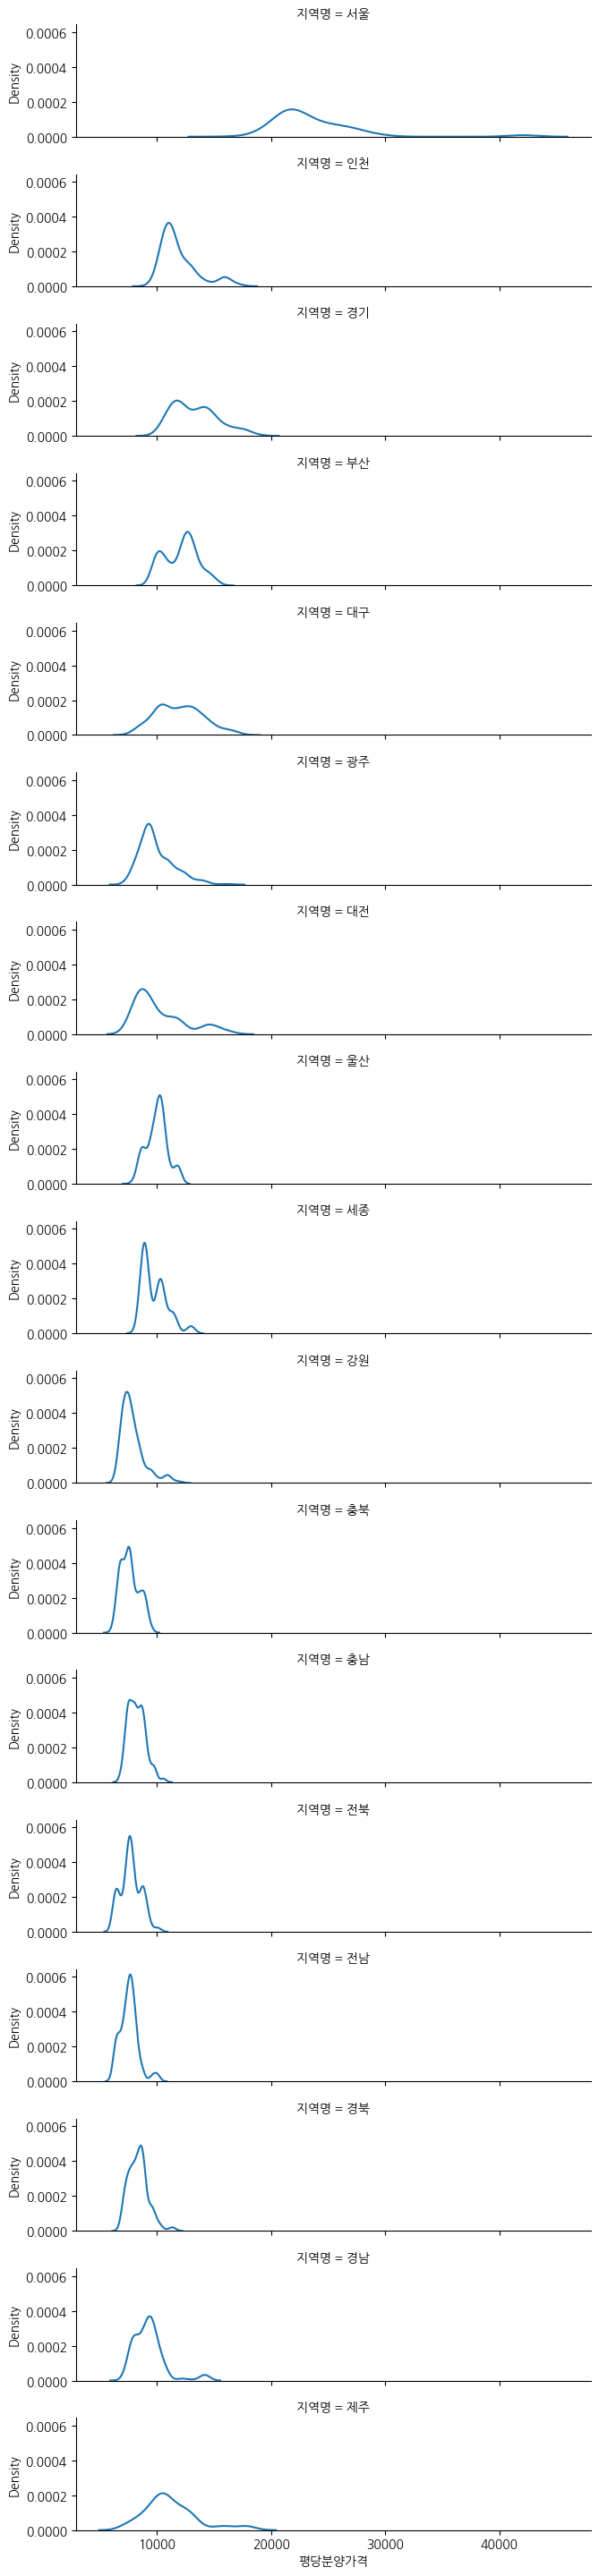

In [19]:
# FacetGrid를 사용해 판을 만든 후
g = sns.FacetGrid(df_last, row="지역명",
                  height=1.7, aspect=4,)

# map을 사용해 FacetGrid안에 그래프를 넣는다
g.map(sns.kdeplot, "평당분양가격")

### pairplot

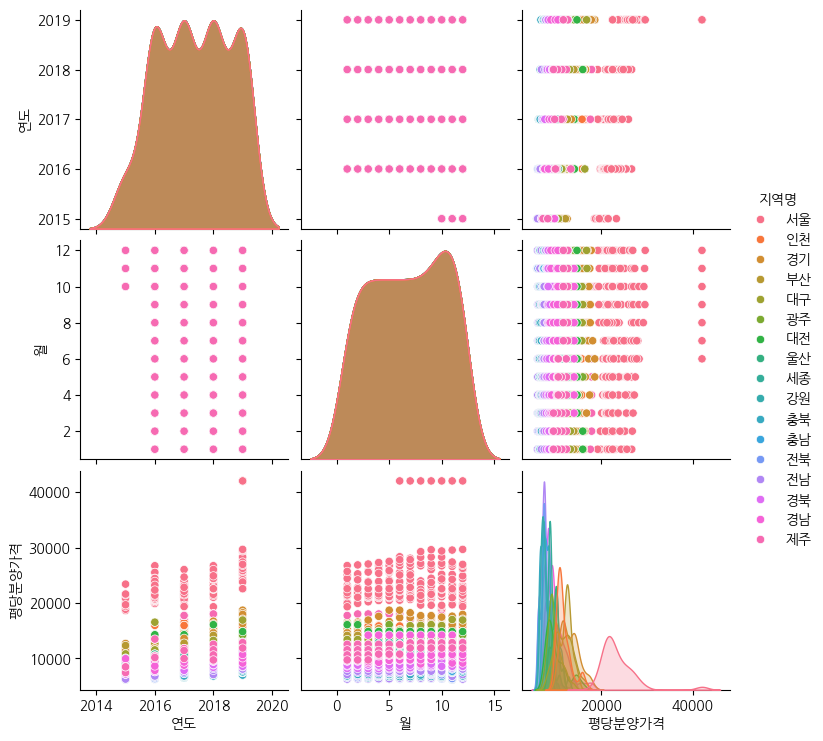

In [51]:
sns.pairplot(df_last[['연도', '월', '평당분양가격', '지역명']], hue = '지역명')

### heatmap

<Axes: xlabel='지역명', ylabel='연도'>

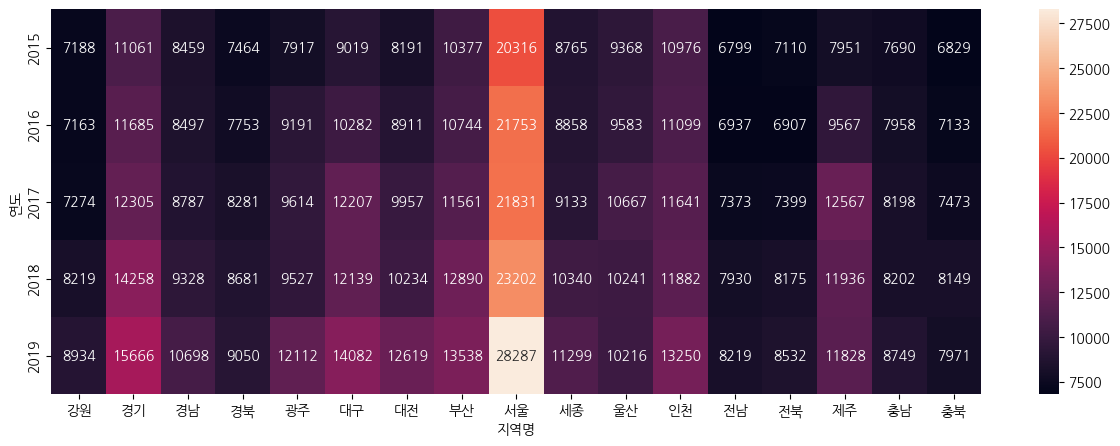

In [57]:
t = df_last.pivot_table(index = '연도', columns = '지역명', values = '평당분양가격')

# annot는 heatmap위에 value를 나타낼지를 결정
plt.figure(figsize = (15, 5))
sns.heatmap(t, annot = True, fmt = '.0f')

<Axes: xlabel='연도', ylabel='지역명'>

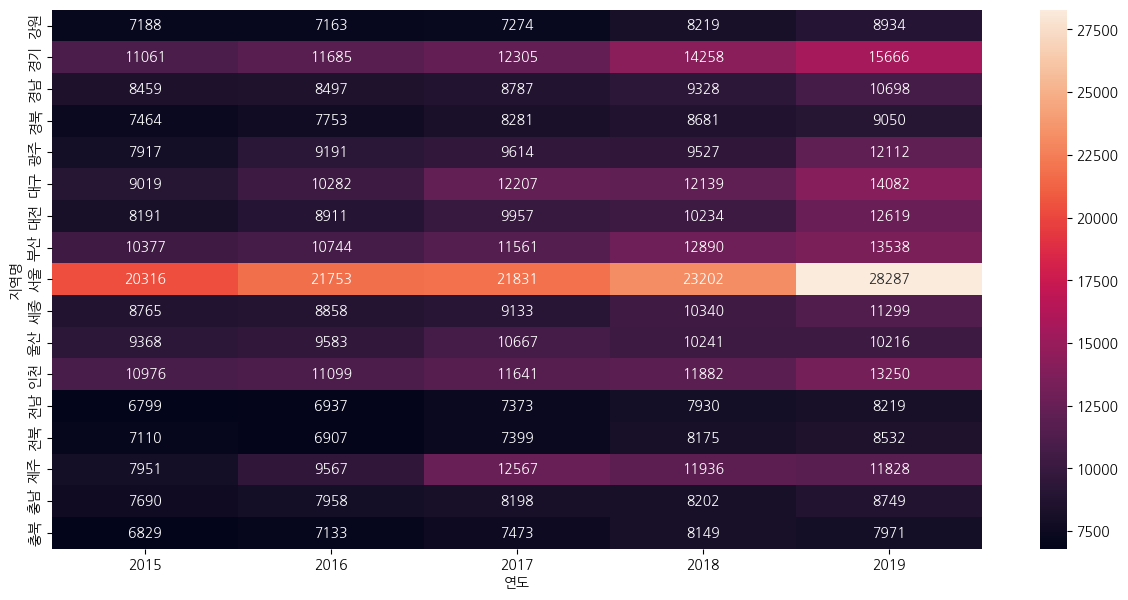

In [58]:
# row와 columns을 바꿔서 다른시각으로 heatmap생성 가능
plt.figure(figsize = (15, 7))
sns.heatmap(t.transpose(), annot = True, fmt = '.0f')

## melt로 tidy data 만들기

* pandas의 melt를 사용해 df_first를 tidy data의 형태로 가공 (df_last는 이미 tidy data 형태)
* tidy data
  * 각 변수는 하나의 column을 이룸
  * 각 관측값은 하나의 row를 이룸
  * 각 데이터셋은 하나의 관찰 단위 유형에 대한 정보만 포함해야함 (판매 데이터와 직원데이터는 하나의 테이블에 결합되면 안됨)

### melt()

In [33]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [35]:
# id_vars: 변환 후에도 그대로 유지할 column
# var_name: 변환된 데이터에 새로 생성될 변수 이름
# value_name: 변환된 데이터 새로 생성될 값 이름
df_first_melt = df_first.melt(id_vars = '지역', var_name = '기간', value_name = '평당분양가격')

In [36]:
# df_first_melt 변수에 담겨진 column의 이름 변경
df_first_melt.columns = ['지역명', '기간', '평당분양가격']

### '기간'을 연도와 월로 분리

In [37]:
# parse_year
def parse_year(date):
    return int(date.split('년')[0])

# parse_month
def parse_month(date):
    return int(date.split('년')[1].replace('월', ''))

In [39]:
# apply()를 사용해 df_first_melt데이터에 '연도'와 '월' column을 생성
df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)
df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)
df_first_melt.head()

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


### concat()

In [40]:
# df_last와 병합하기 위해서는 df_frist_melt와 column들의 이름이 같아야함
df_last.columns

Index(['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적'], dtype='object')

In [41]:
df_first_melt.columns

Index(['지역명', '기간', '평당분양가격', '연도', '월'], dtype='object')

In [42]:
# df_last와 df_first_melt에 동시에 존재하는 columns를 따로 저장
cols = ['지역명', '연도', '월', '평당분양가격']

In [43]:
# df_last에는 df_first에 존재하지 않는 '전용면적' column이 존재함
# 그렇기 때문에 '전용면적' 중 전체에 해당하는 값만 사용
# df_last (원본데이터)의 변형을 막기위해 copy()를 사용

# df_last['전용면적'] == '전체'의 조건을 충족한 rows만 return
df_last_prepare = df_last.loc[df_last['전용면적'] == '전체', cols].copy()

In [47]:
# df_first_melt에서 동시에 존재하는 columns만 가져옴
df_first_prepare = df_first_melt[cols].copy()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098
...,...,...,...,...
352,전북,2015,8,6580
353,전남,2015,8,6289
354,경북,2015,8,7037
355,경남,2015,8,7665


In [49]:
df = pd.concat([df_first_prepare, df_last_prepare])
df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9
